In [226]:
import math
import nilearn as ni
from nilearn import plotting
from nilearn import image
from nilearn.image import math_img
from nilearn.image import index_img
from nilearn.regions import connected_regions
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import numpy as np

oldfont = plt.rcParams['font.sans-serif']
plt.rcParams['font.sans-serif'] = ['Helvetica']


# Metacognition in the cognitive architecture

## The CMC

In [351]:
wm = image.load_img("rois/cmc/wm_optimized.nii")
action = image.load_img("rois/cmc/action_optimized.nii")
ltm = image.load_img("rois/cmc/ltm_optimized.nii")
perception = image.load_img("rois/cmc/perception_optimized.nii")
pm = image.load_img("rois/cmc/procedural_optimized.nii")

IMAGES = [wm, ltm, action, pm,  perception]
NAMES = ["Working Memory", "Long-Term Memory", "Action", "Procedural", "Perception"]
BRAIN_NAMES = ["Prefrontal Cortex", "Medial Temporal Cortex", "Motor Cortex", "Basal Ganglia", "Visual Cortex"]
COLORS = ["aqua", "orange", "darkorchid", "limegreen", "tomato"]

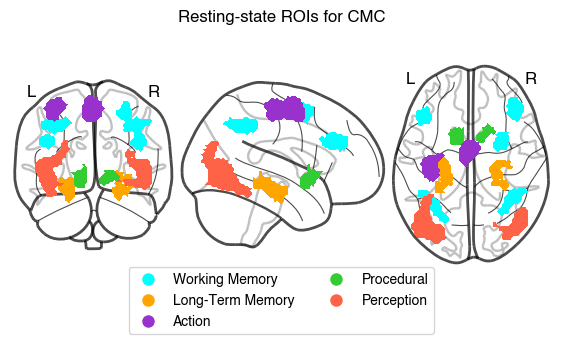

In [377]:
fig, axs = plt.subplots(1,1, figsize=(7, 3.5))
display = plotting.plot_glass_brain(None, axes=axs)
for img, col in zip(IMAGES, COLORS):
    display.add_contours(img, levels=[0.001], filled=True, colors=col)

handles = [Line2D([0], [0], marker='o', markerfacecolor=x, color="w", markersize=10) for x in COLORS]

axs.set_title("Resting-state ROIs for CMC")
fig.legend(handles, NAMES, loc="lower center", ncol=2)
plt.savefig("cmc_regions_optimized.png")
plt.show()

In [230]:
Z = [-20, -10, -2, 25, 45, 55]
X = [-40, -10, -2, 2, 10, 40]

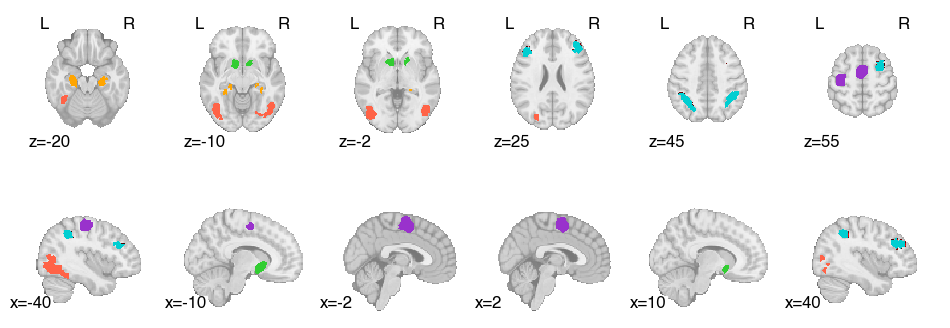

In [282]:
fig, axs = plt.subplots(2,1, figsize=(12, 4))
display = plotting.plot_stat_map(wm, threshold=3, display_mode="z", axes=axs[0], cut_coords=Z,
                                 annotate=True, colorbar=False)
for img, col in zip(IMAGES, COLORS):
    display.add_contours(img, levels=[0.001], filled=True, colors=col)
    
display = plotting.plot_stat_map(wm, threshold=3, display_mode="x", axes=axs[1], cut_coords=X,
                                 annotate=True, colorbar=False)
for img, col in zip(IMAGES, COLORS):
    display.add_contours(img, levels=[0.001], filled=True, colors=col)
plt.show()

## Meta-analysis

Colors for the four images

In [316]:
META_COLORS = ["#FF0BFF88", "#00FF7F88", "#DAA52088", "#6495ED88"]

### Feeling of Knowing

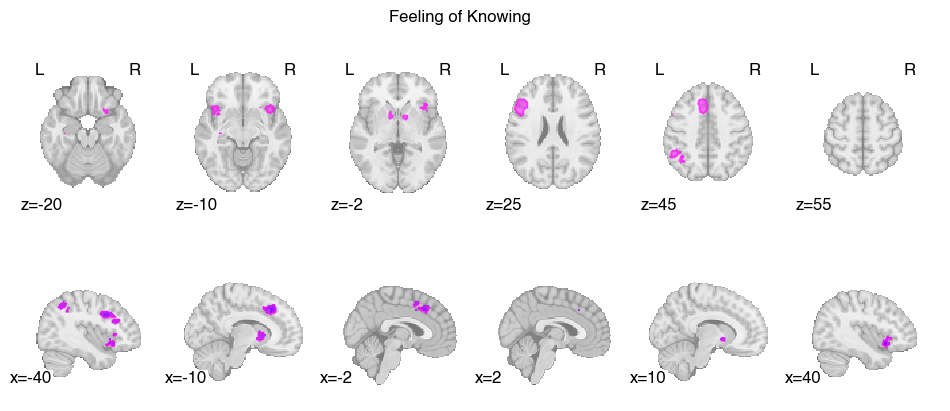

In [329]:
fok_image = image.load_img("rois/meta/MC1_FOK/z_corr-FDR_method-indep.nii.gz")

fig, axs = plt.subplots(2,1, figsize=(12, 4.5))
display = plotting.plot_stat_map(fok_image, threshold=10, display_mode="z", axes=axs[0], cut_coords=Z,
                                 annotate=True, colorbar=False, cmap="blue_transparent_full_alpha_range")
display.add_contours(fok_image, levels=[1.6], filled=True, colors=META_COLORS[0])

display = plotting.plot_stat_map(fok_image, threshold=1.6, display_mode="x", axes=axs[1], cut_coords=X,
                                 annotate=True, colorbar=False, cmap="blue_transparent_full_alpha_range")
display.add_contours(fok_image, levels=[1.6], filled=True, colors=META_COLORS[0])

fig.suptitle("Feeling of Knowing")
plt.show()

### Decision confidence

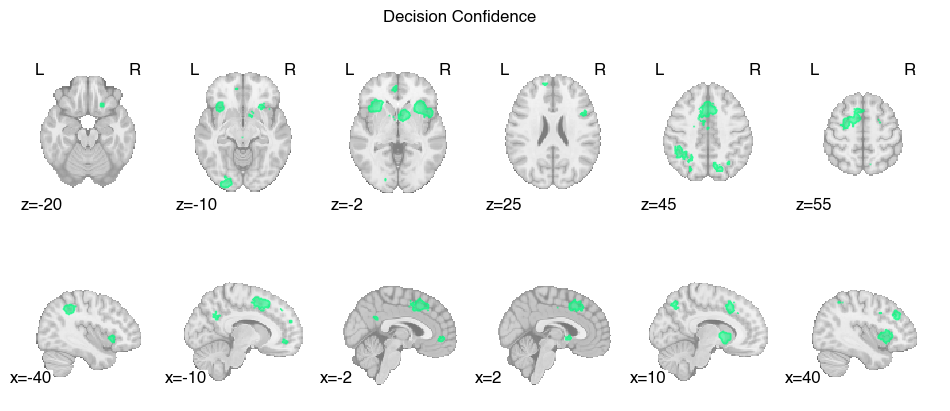

In [327]:
dc_image = image.load_img("rois/meta/MC2_DC//z_corr-FDR_method-indep.nii.gz")

fig, axs = plt.subplots(2,1, figsize=(12, 4.5))
display = plotting.plot_stat_map(dc_image, threshold=10, display_mode="z", axes=axs[0], cut_coords=Z,
                                 annotate=True, colorbar=False, cmap="blue_transparent_full_alpha_range")
display.add_contours(dc_image, levels=[1.6], filled=True, colors=META_COLORS[1])

display = plotting.plot_stat_map(dc_image, threshold=10, display_mode="x", axes=axs[1], cut_coords=X,
                                 annotate=True, colorbar=False, cmap="blue_transparent_full_alpha_range")
display.add_contours(dc_image, levels=[1.6], filled=True, colors=META_COLORS[1])
fig.suptitle("Decision Confidence")
plt.show()

### Response Conflict

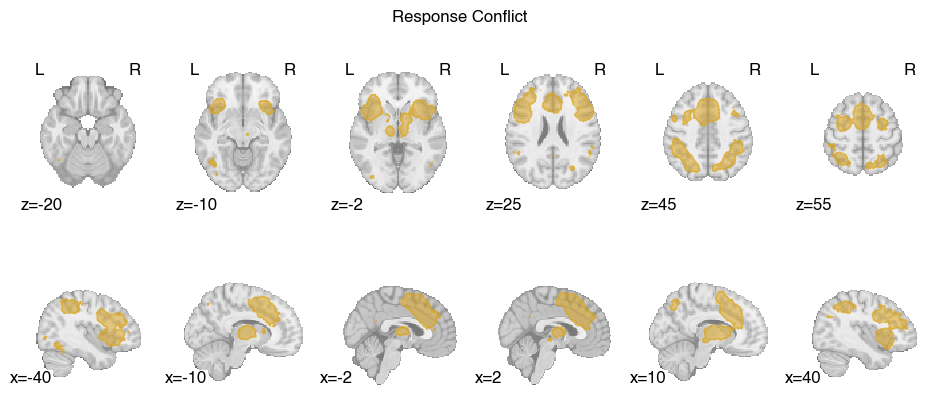

In [333]:
rc_image = image.load_img("rois/meta/MC3_RC//z_corr-FDR_method-indep.nii.gz")

fig, axs = plt.subplots(2,1, figsize=(12, 4.5))
display = plotting.plot_stat_map(rc_image, threshold=20, display_mode="z", axes=axs[0], cut_coords=Z,
                                 annotate=True, colorbar=False, cmap="blue_transparent_full_alpha_range")
display.add_contours(rc_image, levels=[1.6], filled=True, colors=META_COLORS[2])

display = plotting.plot_stat_map(rc_image, threshold=20, display_mode="x", axes=axs[1], cut_coords=X,
                                 annotate=True, colorbar=False, cmap="blue_transparent_full_alpha_range")
display.add_contours(rc_image, levels=[1.6], filled=True, colors=META_COLORS[2])

fig.suptitle("Response Conflict")
plt.show()

### Expectation Violation

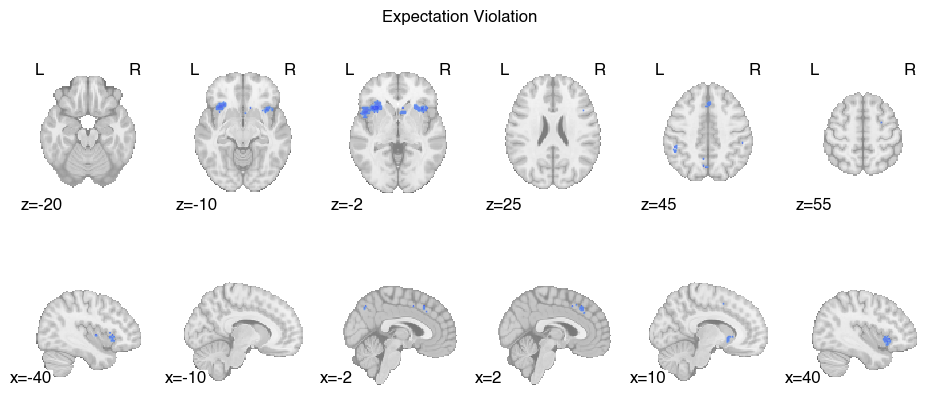

In [339]:
ev_image = image.load_img("rois/meta/MC4_EV//z_corr-FDR_method-indep.nii.gz")

fig, axs = plt.subplots(2,1, figsize=(12, 4.5))
display = plotting.plot_stat_map(ev_image, threshold=1.6, display_mode="z", axes=axs[0], cut_coords=Z,
                                 annotate=True, colorbar=False, cmap="blue_transparent_full_alpha_range")
display.add_contours(ev_image, levels=[1.6], filled=True, colors=META_COLORS[3])

display = plotting.plot_stat_map(ev_image, threshold=1.6, display_mode="x", axes=axs[1], cut_coords=X,
                                 annotate=True, colorbar=False, cmap="blue_transparent_full_alpha_range")
display.add_contours(ev_image, levels=[1.6], filled=True, colors=META_COLORS[3])

fig.suptitle("Expectation Violation")
plt.show()

## Overlap

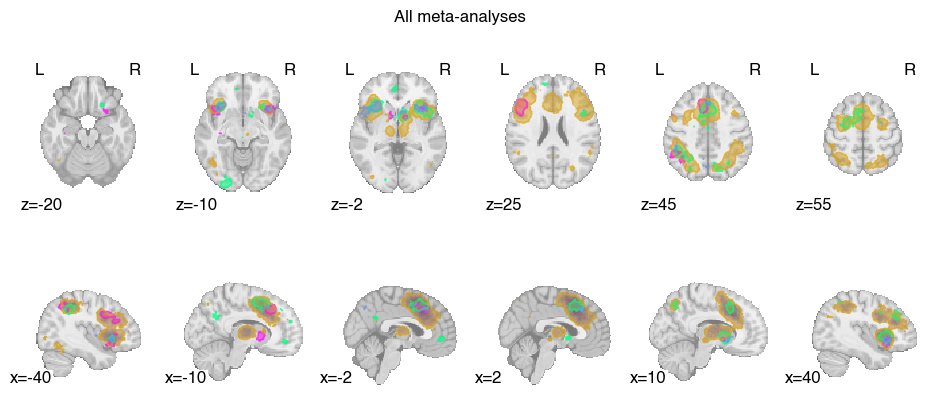

In [341]:
META_IMAGES = [fok_image, dc_image, rc_image, ev_image]


fig, axs = plt.subplots(2,1, figsize=(12, 4.5))
display = plotting.plot_stat_map(fok_image, threshold=10, display_mode="z", axes=axs[0], cut_coords=Z,
                                 annotate=True, colorbar=False, cmap="blue_transparent_full_alpha_range")

for img, col in zip(META_IMAGES, META_COLORS):
    display.add_contours(img, levels=[1.6], filled=True, colors=col)

display = plotting.plot_stat_map(rc_image, threshold=1.6, display_mode="x", axes=axs[1], cut_coords=X,
                                 annotate=True, colorbar=False, cmap="blue_transparent_full_alpha_range")
for img, col in zip(META_IMAGES, META_COLORS):
    display.add_contours(img, levels=[1.6], filled=True, colors=col)

fig.suptitle("All meta-analyses")
plt.show()

In [242]:
META_IMAGES_BIN = [image.binarize_img(i, threshold=0.6) for i in META_IMAGES]
meta_overlap_img = math_img("img1 * img2 * img3 * img4",
                      img1=META_IMAGES_BIN[0], 
                      img2=META_IMAGES_BIN[1],
                      img3=META_IMAGES_BIN[2], 
                      img4=META_IMAGES_BIN[3],
                     )
meta_overlap_img = image.threshold_img(meta_overlap_img, threshold=0.1, cluster_threshold=200)

/var/folders/99/15zptlt56d7f2h8pxlt9k4000000gn/T/ipykernel_26666/2213590080.py:1: DeprecationWarning: The current default behavior for the "two_sided" argument is  "True". This behavior will be changed to "False" in version 0.13.
  META_IMAGES_BIN = [image.binarize_img(i, threshold=0.6) for i in META_IMAGES]


/opt/anaconda3/lib/python3.11/site-packages/nilearn/plotting/displays/_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


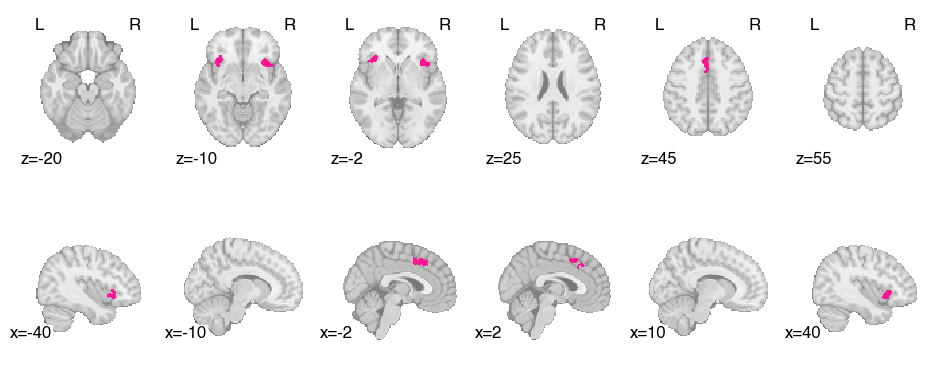

In [284]:
fig, axs = plt.subplots(2,1, figsize=(12, 4.5))
display = plotting.plot_stat_map(meta_overlap_img, threshold=1, display_mode="z", axes=axs[0], cut_coords=Z,
                                 annotate=True, colorbar=False, cmap="black_pink")

display.add_contours(meta_overlap_img, levels=[0.001], filled=True, colors="deeppink")

display = plotting.plot_stat_map(meta_overlap_img, threshold=1, display_mode="x", axes=axs[1], cut_coords=X,
                                 annotate=True, colorbar=False, cmap="black_pink")
display.add_contours(meta_overlap_img, levels=[0.001], filled=True, colors="deeppink")


## CMC and Metacognitive assessment

### CMC vs. Automatic Metacognitive Network

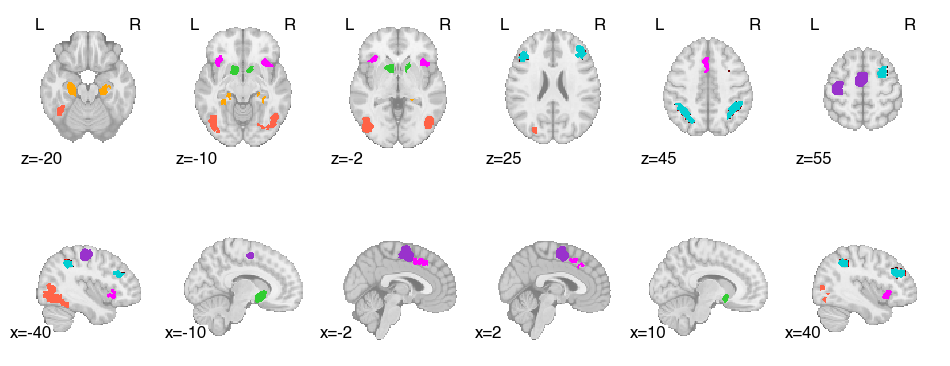

In [290]:
fig, axs = plt.subplots(2,1, figsize=(12, 4.5))

display = plotting.plot_stat_map(wm, threshold=3, display_mode="z", axes=axs[0], cut_coords=Z,
                                 annotate=True, colorbar=False)
for img, col in zip(IMAGES, COLORS):
    display.add_contours(img, levels=[0.001], filled=True, colors=col)
display.add_contours(meta_overlap_img, levels=[0.001], filled=True, colors="magenta")
    
display = plotting.plot_stat_map(wm, threshold=3, display_mode="x", axes=axs[1], cut_coords=X,
                                 annotate=True, colorbar=False)
for img, col in zip(IMAGES, COLORS):
    display.add_contours(img, levels=[0.001], filled=True, colors=col)
display.add_contours(meta_overlap_img, levels=[0.001], filled=True, colors="magenta")

plt.show()

### Comparison: CMC vs. Deliberate Metacognition (False Belief Task)

/opt/anaconda3/lib/python3.11/site-packages/nilearn/plotting/displays/_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


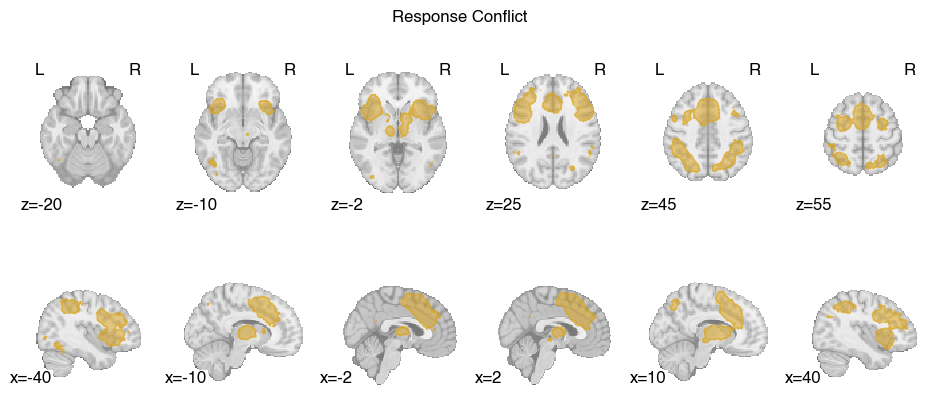

In [345]:
fb_image = image.load_img("rois/meta/MC0_FB/z_corr-FDR_method-indep.nii.gz")

fig, axs = plt.subplots(2,1, figsize=(12, 4.5))
display = plotting.plot_stat_map(fb_image, threshold=20, display_mode="z", axes=axs[0], cut_coords=Z,
                                 annotate=True, colorbar=False, cmap="blue_transparent_full_alpha_range")
display.add_contours(rc_image, levels=[1.6], filled=True, colors=META_COLORS[2])

display = plotting.plot_stat_map(fb_image, threshold=20, display_mode="x", axes=axs[1], cut_coords=X,
                                 annotate=True, colorbar=False, cmap="blue_transparent_full_alpha_range")
display.add_contours(rc_image, levels=[1.6], filled=True, colors=META_COLORS[2])

fig.suptitle("Response Conflict")
plt.show()

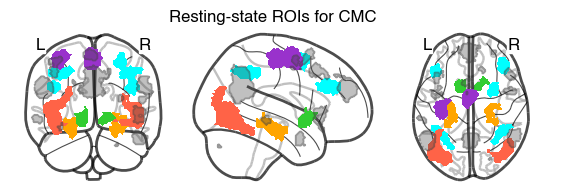

In [371]:
fig, axs = plt.subplots(1,1, figsize=(7, 2))
display = plotting.plot_glass_brain(None, axes=axs, display_mode="ortho")
for img, col in zip(IMAGES, COLORS):
    display.add_contours(img, levels=[0.001], filled=True, colors=col)

display.add_contours(fb_image, levels=[1.5], filled=True, colors="#44444455")

#handles = [Line2D([0], [0], marker='o', markerfacecolor=x, color="w", markersize=10) for x in COLORS]

fig.suptitle("CMC vs. False Belief Task")
#fig.legend(handles, NAMES, loc="lower center", ncol=2)
plt.savefig("cmc_regions_optimized.png")
plt.show()

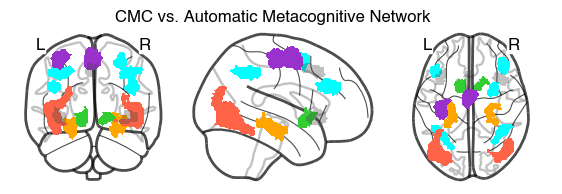

In [375]:
fig, axs = plt.subplots(1,1, figsize=(7, 2))
display = plotting.plot_glass_brain(None, axes=axs, display_mode="ortho")
for img, col in zip(IMAGES, COLORS):
    display.add_contours(img, levels=[0.001], filled=True, colors=col)

display.add_contours(meta_overlap_img, levels=[0.01], filled=True, colors="#44444455")

#handles = [Line2D([0], [0], marker='o', markerfacecolor=x, color="w", markersize=10) for x in COLORS]

fig.suptitle("CMC vs. Automatic Metacognitive Network")
#fig.legend(handles, NAMES, loc="lower center", ncol=2)
plt.savefig("cmc_regions_optimized.png")
plt.show()

# Reference brain

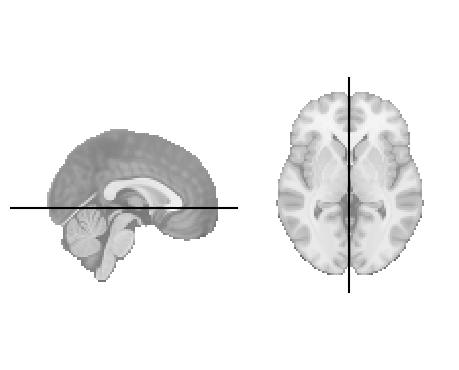

In [314]:
plotting.plot_stat_map(wm, threshold=100, display_mode="xz", annotate=False, colorbar=False,  cut_coords=[0,0])
plt.show()

## 3D Rendering

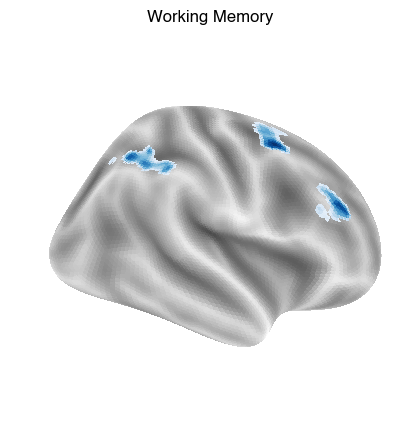

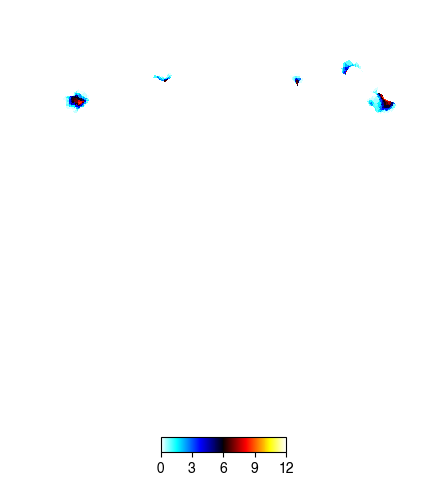

In [247]:
from nilearn import datasets
from nilearn import surface

fsaverage = datasets.fetch_surf_fsaverage()

wm_surf = surface.vol_to_surf(wm, fsaverage.pial_right)
pm_surf = surface.vol_to_surf(perception, fsaverage.pial_right)

plotting.plot_surf_stat_map(fsaverage.infl_right, wm_surf, hemi='right',
                            title='Working Memory', colorbar=False, cmap="Blues",
                            threshold=1., bg_map=fsaverage.sulc_right)

plotting.plot_img_on_surf(wm,
                          views=['lateral', 'medial'],
                          hemispheres=['left', 'right'],
                          colorbar=True)
plotting.show()